In [362]:
# necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import random

In [192]:
# March Madness results from 1985
# Dataset from https://data.world/michaelaroy/ncaa-tournament-results

df = pd.read_csv("BIG_DANCE_CSV.csv")
print(df.shape)
df.head()

(2205, 10)


,Year,Round,Region Number,Region Name,Seed A,Score A,Team A,Team B,Score B,Seed B
0,1985,1,1,West,1,83,St Johns,Southern,59,16
1,1985,1,1,West,2,81,VCU,Marshall,65,15
2,1985,1,1,West,3,65,NC State,Nevada,56,14
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13
4,1985,1,1,West,5,58,Washington,Kentucky,65,12


In [220]:
# Any cleaning of data

# Added new column "Winner" where determines if higher seed is the winner (TRUE) otherwise upset (FALSE)
winner = []
for i in range(0, len(df)):
    seed = df["Seed A"][i] < df["Seed B"][i] # lower seed
    score = df["Score A"][i] > df["Score B"][i] # more points
    if ((seed and score) or ((not seed) and (not score))):
        # no upset
        winner.append(True)
    else:
        # upset
        winner.append(False)
df["Winner"] = winner

# Add new column "Win Difference" where determines how much team A won by
df["Win Difference"] = df["Score A"] - df["Score B"]

# Add new column "Seed Difference" where calculates difference in seed of A
df["Seed Difference"] = df["Seed B"] - df["Seed A"]

df.head()

,Year,Round,Region Number,Region Name,Seed A,Score A,Team A,Team B,Score B,Seed B,Winner,Win Difference,Seed Difference
0,1985,1,1,West,1,83,St Johns,Southern,59,16,True,24,15
1,1985,1,1,West,2,81,VCU,Marshall,65,15,True,16,13
2,1985,1,1,West,3,65,NC State,Nevada,56,14,True,9,11
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13,True,5,9
4,1985,1,1,West,5,58,Washington,Kentucky,65,12,False,-7,7


In [125]:
# EDA

# Finding the percentage of non-upsets in each round
non_upsets = np.empty([0, 6])
for round_i in range(1, 7):
    df_round_i = df[df["Round"] == round_i] # rows of the round index
    non_upsets = np.append(non_upsets, statistics.mean(df_round_i["Winner"]))
print("Expected higher seed win %:", non_upsets)
upsets = 1 - non_upsets
print("Upset %:", upsets)



Expected higher seed win %: [0.74285714 0.7125     0.71428571 0.55       0.61428571 0.71428571]
Upset %: [0.25714286 0.2875     0.28571429 0.45       0.38571429 0.28571429]


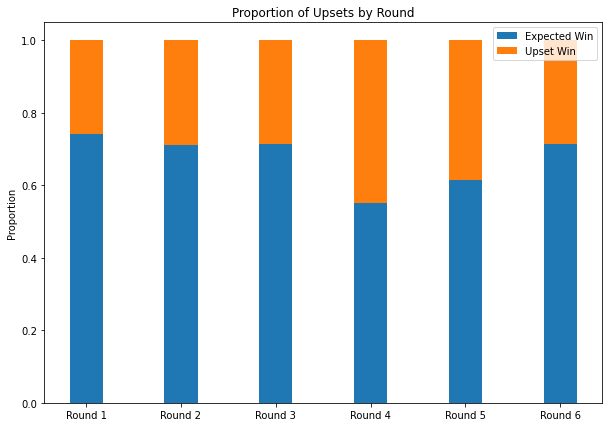

In [136]:
N = 6
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, non_upsets, width)
p2 = plt.bar(ind, upsets, width, bottom = non_upsets)
 
plt.ylabel("Proportion")
plt.title("Proportion of Upsets by Round")
plt.xticks(ind, ("Round 1", "Round 2", "Round 3", "Round 4", "Round 5", "Round 6"))
plt.legend((p1[0], p2[0]), ("Expected Win", "Upset Win"))
 
plt.show()

In [342]:
def trend_plot(x_var, y_var, subset, dataframe):
    # Prints scatterplot with linear best fit regression line based on x, y
        # x_var: column name for predictor variable
        # y_var: column name for response variable
        # subset: column name to print unique categorical factor plots
        # dataframe: df of data
    # Required libraries:
        # import matplotlib.pyplot as plt
        # from sklearn.linear_model import LinearRegression
        # from sklearn.metrics import mean_squared_error, r2_score
    subset_levels = dataframe[subset].unique()
    fig, ax = plt.subplots(len(subset_levels), 1, figsize = (6, 20))
    # loop for each plot to be printed
    for i in range(0, len(subset_levels)):
        dim_y = 0
        dim_y = 0
        X = np.array(dataframe[dataframe[subset] == subset_levels[i]][x_var]) # values of x_var in df
        y = np.array(dataframe[dataframe[subset] == subset_levels[i]][y_var]) # values of y_var in df
        reg = LinearRegression().fit(X.reshape(-1, 1), y)
        ytrain = reg.intercept_ + reg.coef_ * X
        ax[i].plot(X, y, 'ro', X, ytrain,'b-')
        ax[i].axhline(y = 0, color = 'g')
        ax[i].set(title = subset + " " + str(subset_levels[i]), xlabel = x_var, ylabel = y_var)
        ax[i].legend(["r-squared: " + str(round(r2_score(y, ytrain), 2))])
        # print("Regression Coef:", reg.coef_)
        # print("Regression intercept:", reg.intercept_)
        # print("MSE:", mean_squared_error(y, ytrain))
        # print("r-squared:", r2_score(y, ytrain))
        print("\n")
    fig.tight_layout()

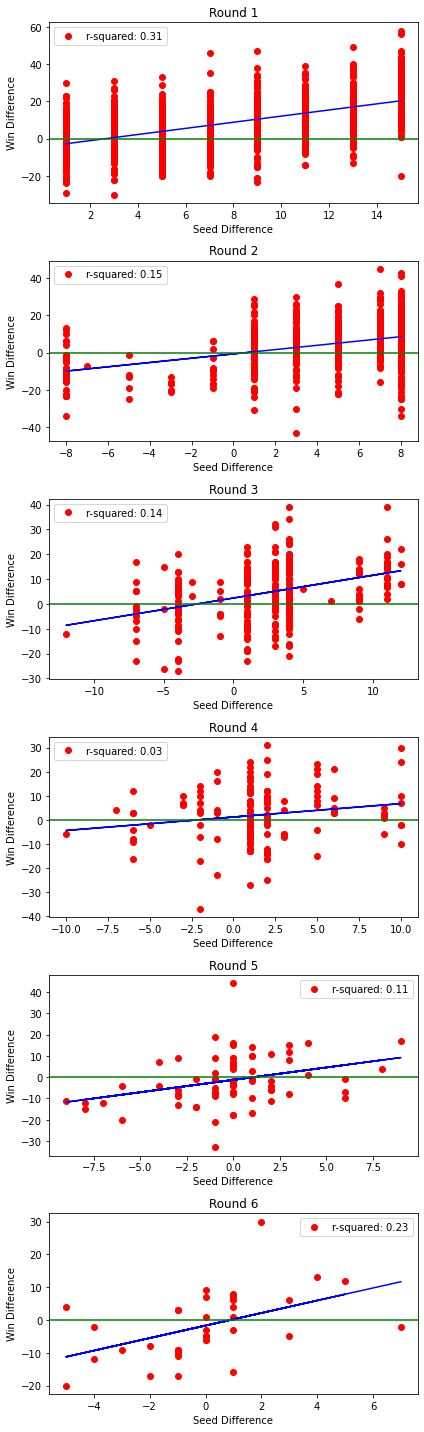

In [343]:
trend_plot("Seed Difference", "Win Difference", "Round", df)

In [351]:
df.head()

,Year,Round,Region Number,Region Name,Seed A,Score A,Team A,Team B,Score B,Seed B,Winner,Win Difference,Seed Difference
0,1985,1,1,West,1,83,St Johns,Southern,59,16,True,24,15
1,1985,1,1,West,2,81,VCU,Marshall,65,15,True,16,13
2,1985,1,1,West,3,65,NC State,Nevada,56,14,True,9,11
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13,True,5,9
4,1985,1,1,West,5,58,Washington,Kentucky,65,12,False,-7,7


In [590]:
# Round 1 predictions
def round1():
    round1winners = []
    for i in range(1, 9):
        # Rows with specific seed and matchup round 1
        df_matchup = df[(df["Round"] == 1) & (df["Seed A"] == i) & (df["Seed B"] == 17 - i)]
        if (len(df_matchup) < 1):
            # checks if there was past matchup or else uses round upset prob
            df_round_1 = df[df["Round"] == 1] # rows of round 1
            prob = statistics.mean(df_round_1["Winner"])
        else:
            prob = statistics.mean(df_matchup["Winner"]) # prob of expected winner winning
        # random choice of matchup based on upset prob
        round1winners.append(random.choices([i, 17 - i], [prob, 1 - prob])[0])
    return round1winners

totalRound1 = [round1(), round1(), round1(), round1()]
print("Round 1 winners:\n", totalRound1)

# Round 2 predictions
def round2(round1winners):
    round2winners = []
    for i in range(0, 4):
        df_matchup = df[(df["Round"] == 2) & (df["Seed A"] == round1winners[i]) & (df["Seed B"] == round1winners[7 - i])]
        if (len(df_matchup) < 1):
            df_round_2 = df[df["Round"] == 2] # rows of round 2
            prob = statistics.mean(df_round_2["Winner"])
        else:
            prob = statistics.mean(df_matchup["Winner"]) # prob of expected winner winning
        round2winners.append(random.choices([round1winners[i], round1winners[7 - i]], [prob, 1 - prob])[0])
    return(round2winners)

totalRound2 = [round2(totalRound1[0]), round2(totalRound1[1]), round2(totalRound1[2]), round2(totalRound1[3])]
print("Round 2 winners:\n", totalRound2)

# Round 3 predictions
def round3(round2winners):
    round3winners = []
    for i in range(0, 2):
        df_matchup = df[(df["Round"] == 3) & (df["Seed A"] == round2winners[i]) & (df["Seed B"] == round2winners[3 - i])]
        if (len(df_matchup) < 1):
            df_round_3 = df[df["Round"] == 3] # rows of round 3
            prob = statistics.mean(df_round_3["Winner"])
        else:
            prob = statistics.mean(df_matchup["Winner"]) # prob of expected winner winning
        round3winners.append(random.choices([round2winners[i], round2winners[3 - i]], [prob, 1 - prob])[0])
    return(round3winners)

totalRound3 = [round3(totalRound2[0]), round3(totalRound2[1]), round3(totalRound2[2]), round3(totalRound2[3])]
print("Round 3 winners:\n", totalRound3)

# Round 4 predictions
def round4(round3winners):
    round4winners = []
    df_matchup = df[(df["Round"] == 4) & (df["Seed A"] == round3winners[0]) & (df["Seed B"] == round3winners[1])]
    if (len(df_matchup) < 1):
        df_round_4 = df[df["Round"] == 4] # rows of round 4
        prob = statistics.mean(df_round_4["Winner"])
    else:
        prob = statistics.mean(df_matchup["Winner"]) # prob of expected winner winning
    round4winners = random.choices([round3winners[0], round3winners[1]], [prob, 1 - prob])[0]
    return round4winners
totalRound4 = [round4(totalRound3[0]), round4(totalRound3[1]), round4(totalRound3[2]), round4(totalRound3[3])]
print("Round 4 winners:\n", totalRound4)

# Round 5 predictions
round5winners = []
for i in range(0, 2):
    df_matchup = df[(df["Round"] == 5) & (df["Seed A"] == totalRound4[i]) & (df["Seed B"] == totalRound4[3 - i])]
    if (len(df_matchup) < 1):
        df_round_5 = df[df["Round"] == 5] # rows of round 5
        prob = statistics.mean(df_round_5["Winner"])
    else:
        prob = statistics.mean(df_matchup["Winner"]) # prob of expected winner winning
    round5winners.append(random.choices([totalRound4[i], totalRound4[3 - i]], [prob, 1 - prob])[0])
print("Round 5 winners:\n", round5winners)
# Testing if it matches
round_rows = df[df["Round"] == 6]
if (((round_rows["Seed A"] == round5winners[0]) & (round_rows["Seed B"] == round5winners[1])).any() 
   | ((round_rows["Seed A"] == round5winners[1]) & (round_rows["Seed B"] == round5winners[0])).any()):
    print("(Has happened)")
else:
    print("(Never Happened)")

# Round 6 predictions
df_matchup = df[(df["Round"] == 6) & (df["Seed A"] == round5winners[0]) & (df["Seed B"] == round5winners[1])]
if (len(df_matchup) < 1):
    df_round_6 = df[df["Round"] == 6] # rows of round 6
    prob = statistics.mean(df_round_6["Winner"])
else:
    prob = statistics.mean(df_matchup["Winner"]) # prob of expected winner winning
round6winners = random.choices([round5winners[0], round5winners[1]], [prob, 1 - prob])[0]
print("Round 6 winners:\n", round6winners)
# Testing if it matches
if (((round_rows["Seed A"] == round6winners) & (round_rows["Winner"] == True)).any()
    | ((round_rows["Seed B"] == round6winners) & (round_rows["Winner"] == False)).any()):
    # checks if test value won
    print("(Has happened)")
else:
    print("(Never happened)")

Round 1 winners:
 [[1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 11, 10, 8], [1, 2, 3, 4, 5, 6, 10, 8], [1, 2, 3, 4, 5, 11, 7, 9]]
Round 2 winners:
 [[1, 2, 6, 4], [8, 10, 3, 4], [8, 2, 3, 5], [1, 7, 3, 5]]
Round 3 winners:
 [[1, 2], [4, 10], [5, 2], [1, 7]]
Round 4 winners:
 [1, 4, 2, 1]
Round 5 winners:
 [1, 4]
(Has happened)
Round 6 winners:
 1
(Has happened)


In [548]:
print(statistics.mean(round_rows["Score A"]))
print(statistics.mean(round_rows["Score B"]))
print(statistics.mean(round_rows["Win Difference"]))

71.42857142857143
73.17142857142858
-1.7428571428571429


In [587]:
round_rows[(round_rows["Seed A"] > 6) | (round_rows["Seed B"] > 6)]

,Year,Round,Region Number,Region Name,Seed A,Score A,Team A,Team B,Score B,Seed B,Winner,Win Difference,Seed Difference
62,1985,6,1,Championship,1,64,Georgetown,Villanova,66,8,False,-2,7
1700,2011,6,1,Championship,3,53,Connecticut,Butler,41,8,True,12,5
1889,2014,6,1,Championship,7,60,Connecticut,Kentucky,54,8,True,6,1
